In [1]:
import sys
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot

In [2]:
# dataset path
dataset_path = './data/diff_dataset.csv'
testset_path = './data/diff_testset.csv'

In [3]:
# read dataset
dataset = pd.read_csv(dataset_path)
testset = pd.read_csv(testset_path)

In [4]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_type_code
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.016069,3746.0,1.645079,33.0,0.0,0.0,0.000799,0
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000110,3250.0,4.414233,27.0,0.0,0.0,-0.000637,1
2,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000017,3042.0,0.021226,27.0,0.0,0.0,0.016548,2
3,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.033176,3302.0,0.849073,29.0,0.0,0.0,-0.000719,1
4,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000853,2964.0,-0.097270,26.0,0.0,0.0,-0.116916,2


In [5]:
# drop unnamed column
dataset.drop(columns=['Unnamed: 0'], inplace=True)
testset.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
dataset.head(100)

,Unnamed: 0.1,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_type_code
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.016069,3746.0,1.645079,33.0,0.0,0.0,0.000799,0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000110,3250.0,4.414233,27.0,0.0,0.0,-0.000637,1
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000017,3042.0,0.021226,27.0,0.0,0.0,0.016548,2
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.033176,3302.0,0.849073,29.0,0.0,0.0,-0.000719,1
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000853,2964.0,-0.097270,26.0,0.0,0.0,-0.116916,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000009,17624.0,1.926721,49.0,0.0,0.0,0.032807,5
96,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.033300,3018.0,-3.214405,27.0,0.0,0.0,-0.000207,6
97,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.017347,2960.0,1.966997,26.0,0.0,0.0,0.000539,5
98,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.016836,3188.0,-1.794850,28.0,0.0,0.0,0.000334,6


In [7]:
print('dataset:')
print(dataset.shape)
print('testset:')
print(testset.shape)

dataset:
(1861, 997)
testset:
(1681, 997)


In [8]:
column = dataset.columns

X_train = dataset[column[:-1]]
X_test = testset[column[:-1]]
y_train = dataset[column[-1]]
y_test = testset[column[-1]]

X = pd.concat([X_train, X_test], axis=0, ignore_index=True, sort=False)
Y = pd.concat([y_train, y_test], axis=0, ignore_index=True, sort=False)

print(X.shape, Y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3542, 996) (3542,)
(1861, 996) (1861,)
(1681, 996) (1681,)


In [9]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(model.intercept_)
#print(model.coef_)

7.181207168847118


Feature: 0, Score: 1.78417
Feature: 1, Score: -3.37083
Feature: 2, Score: 0.54822
Feature: 3, Score: -0.05105
Feature: 4, Score: -0.07873
Feature: 5, Score: -0.06586
Feature: 6, Score: -0.01432
Feature: 7, Score: -0.02385
Feature: 8, Score: -0.00964
Feature: 9, Score: 0.00687
Feature: 10, Score: 0.00429
Feature: 11, Score: -0.00959
Feature: 12, Score: -0.00669
Feature: 13, Score: -0.02490
Feature: 14, Score: 0.00665
Feature: 15, Score: 0.26502
Feature: 16, Score: 0.00380
Feature: 17, Score: -0.00032
Feature: 18, Score: 0.00135
Feature: 19, Score: 0.00033
Feature: 20, Score: 0.15782
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00317
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.09210
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.06565
Feature: 27, Score: 0.18466
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.06139
Feature: 30, Score: 0.00048
Feature: 31, Score: -0.00115
Feature: 32, Score: -0.12033
Feature: 33, Score: -0.00000
Feature: 34, Score: 0.00000
Feature: 35,

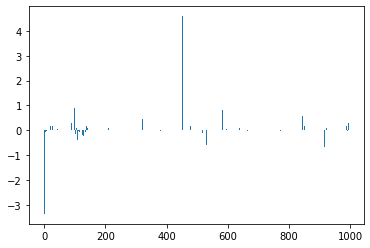

In [12]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<AxesSubplot:>

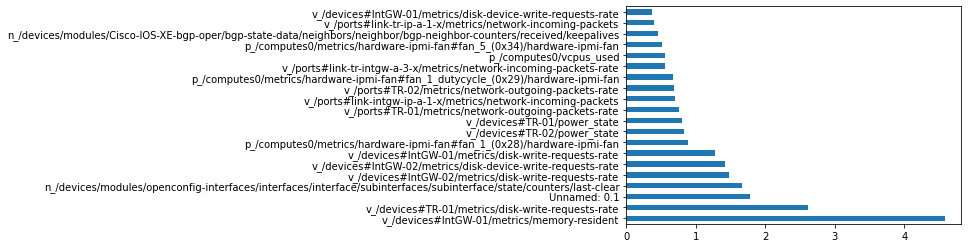

In [13]:
features_importance = pd.Series(importance, index=X.columns)
features_importance.nlargest(20).plot(kind='barh')

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std_X_train = ss.fit_transform(X_train)
std_X_test = ss.transform(X_test)

A standard scaler changes the data so that it follows a standardized distribution, with a zero mean and a standard deviation of one. While we are using the standard scaler today, there are many other scalers that you can use to fit and transform your data. The type of scaler you use will also differ greatly depending on the characteristics of your data.

In [15]:
model.fit(std_X_train, y_train)

LinearRegression()

In [16]:
print(model.intercept_)

6.53943398657277


Feature: 0, Score: -2.00867
Feature: 1, Score: -150805045296.09256
Feature: 2, Score: 6423132605216.55762
Feature: 3, Score: 6297896964896.37891
Feature: 4, Score: 10683406558331.16602
Feature: 5, Score: -2761697680928.20996
Feature: 6, Score: -1752402017429.33057
Feature: 7, Score: -1470255856601.78101
Feature: 8, Score: 99794358781.07866
Feature: 9, Score: -1114934036893.88794
Feature: 10, Score: 1290848894272.06641
Feature: 11, Score: -59547832307.72079
Feature: 12, Score: 1340154401281.25000
Feature: 13, Score: 2568368667685.32764
Feature: 14, Score: 491580797460.07013
Feature: 15, Score: 0.02802
Feature: 16, Score: -747855647950.76111
Feature: 17, Score: -31960590078.37514
Feature: 18, Score: 1146959647952.67773
Feature: 19, Score: 0.08663
Feature: 20, Score: -0.20405
Feature: 21, Score: -0.26168
Feature: 22, Score: -219688488343.26898
Feature: 23, Score: 0.11399
Feature: 24, Score: -0.07132
Feature: 25, Score: 0.51851
Feature: 26, Score: -0.34802
Feature: 27, Score: 0.19965
Featu

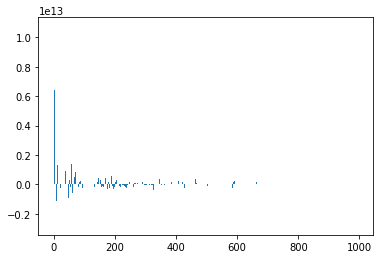

In [17]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()